## Yucatan Hurricans Analysis
Description:
The following data comes from an LTER study measuring the impacts of hurricanes across time in the Yucatan Peninsula to create a model.

## Citation:
Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).

## Access Date: 10/24/2025

## Archive: 
https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-hfr.71.23

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469")
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


## Wrangling
1. convert start.date and end.date to datetime objects
2. filter for cat 5 hurricanes
3. create new column with duration from those 
4. print number of columns

# Data Wrangling

In [2]:
# Convert dates to date time
df["start.date"] = pd.to_datetime(df["start.date"])
df["end.date"] = pd.to_datetime(df["end.date"])


In [3]:
df.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In [4]:
df_cat5 = df[df["ss"] == 5]

In [5]:
# What is the duration of each hurricane?
df_cat5["duration"] = df_cat5["end.date"] - df_cat5["start.date"]
df_cat5

C:\Users\oc3an\AppData\Local\Temp\ipykernel_12936\1898526580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat5["duration"] = df_cat5["end.date"] - df_cat5["start.date"]


,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [6]:
df_cat5["duration"].count()

4

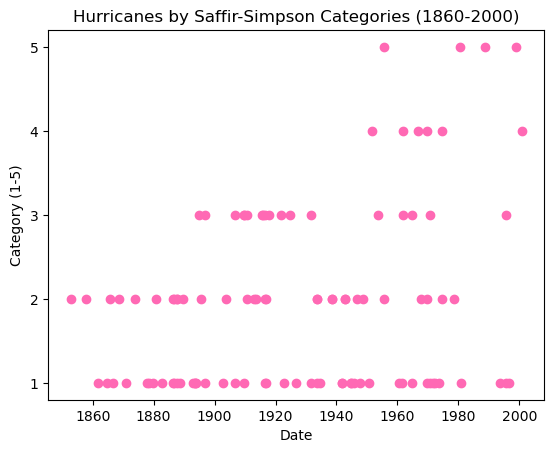

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df["start.date"], df["ss"], c="hotpink")
plt.yticks([1,2,3,4,5])
plt.xlabel("Date")
plt.ylabel("Category (1-5)")
plt.title("Hurricanes by Saffir-Simpson Categories (1860-2000)")
plt.show()

In [ ]:
# Final workflow

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data
df = pd.read_csv("https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469")

# Convert dates to date time
df["start.date"] = pd.to_datetime(df["start.date"])
df["end.date"] = pd.to_datetime(df["end.date"])

# Filter for only cat 5 hurricanes and make a copy of the new dataframe
df_cat5 = df[df["ss"] == 5].copy()

# What is the duration of each hurricane? Create new column 
df_cat5["duration"] = df_cat5["end.date"] - df_cat5["start.date"]

# Return the number of instances of cat 5 hurricanes
df_cat5["duration"].count()

4